<a href="https://colab.research.google.com/github/callmekriti/Desktop/blob/main/Worksheet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
from PIL import Image

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving Lenna_(test_image).png to Lenna_(test_image).png


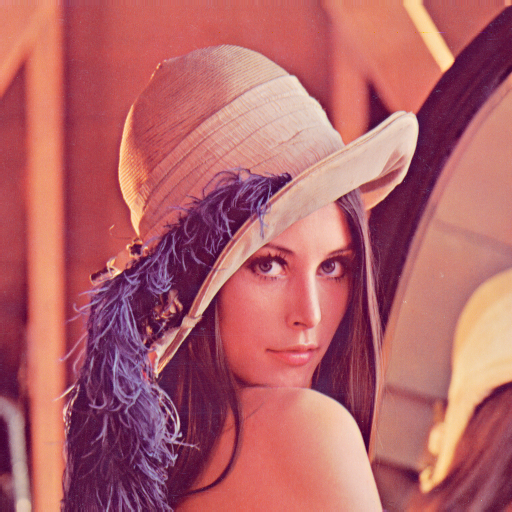

In [ ]:
image_colored = Image.open("/content/Lenna_(test_image).png")
display(image_colored)

In [ ]:
image_array_colored = np.array(image_colored)

In [ ]:
row_100 = image_array_colored[:100,:100,:]

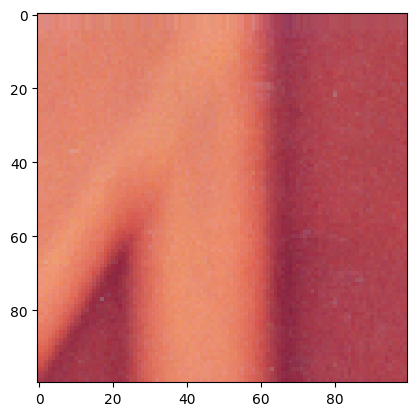

In [ ]:
plt.imshow(row_100)

In [ ]:
#for red channels
red_channel = image_array_colored[:,:,0]

In [ ]:
print(red_channel)

[[226 226 223 ... 230 221 200]
 [226 226 223 ... 230 221 200]
 [226 226 223 ... 230 221 200]
 ...
 [ 84  84  92 ... 173 172 177]
 [ 82  82  96 ... 179 181 185]
 [ 82  82  96 ... 179 181 185]]


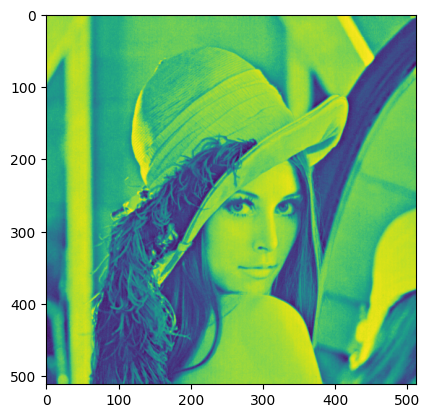

In [ ]:
plt.imshow(red_channel)


In [ ]:
green_channel = image_array_colored[:,:,1]


In [ ]:
print(green_channel)


[[137 137 137 ... 148 130  99]
 [137 137 137 ... 148 130  99]
 [137 137 137 ... 148 130  99]
 ...
 [ 18  18  27 ...  73  68  62]
 [ 22  22  32 ...  70  71  74]
 [ 22  22  32 ...  70  71  74]]


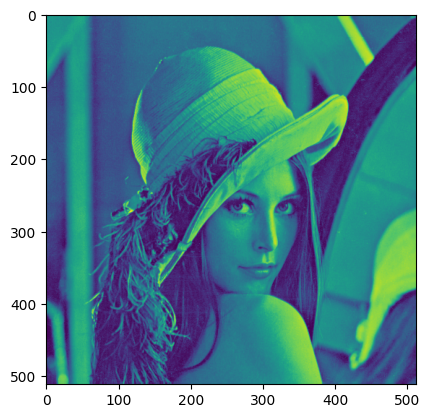

In [ ]:
plt.imshow(green_channel)


In [ ]:
blue_channel = image_array_colored[:,:,2]


In [ ]:
print(blue_channel)

[[125 125 133 ... 122 110  90]
 [125 125 133 ... 122 110  90]
 [125 125 133 ... 122 110  90]
 ...
 [ 60  60  58 ...  84  76  79]
 [ 57  57  62 ...  79  81  81]
 [ 57  57  62 ...  79  81  81]]


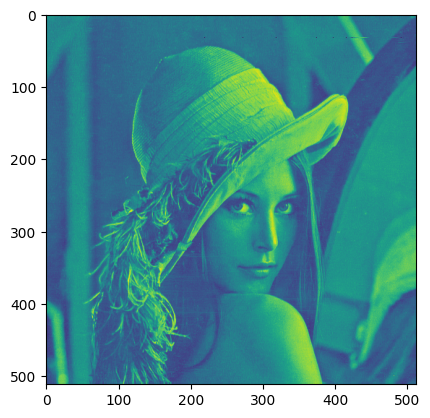

In [ ]:
plt.imshow(blue_channel)

In [ ]:
image_array_colored[:100, :100] = (210, 210, 210)

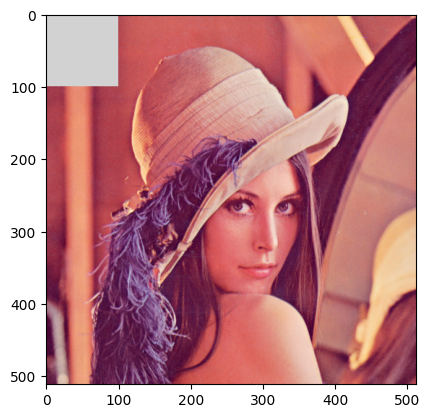

In [ ]:
plt.imshow(image_array_colored)

In [9]:
#Exercise Load a grayscale image using the Pillow library
from google.colab import files
uploaded = files.upload()

Saving cameraman.png to cameraman (1).png


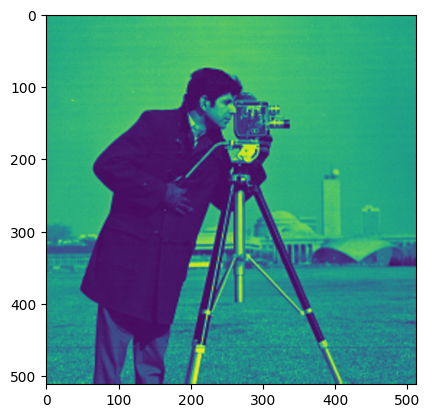

In [10]:
grey_image = Image.open("/content/cameraman.png")
plt.imshow(grey_image)

In [11]:
grey_image_np = np.array(grey_image)

In [12]:
center_section = grey_image_np[grey_image_np.shape[0]//2 - 75:grey_image_np.shape[0]//2 + 75, grey_image_np.shape[1]//2 - 75:grey_image_np.shape[1]//2 + 75]

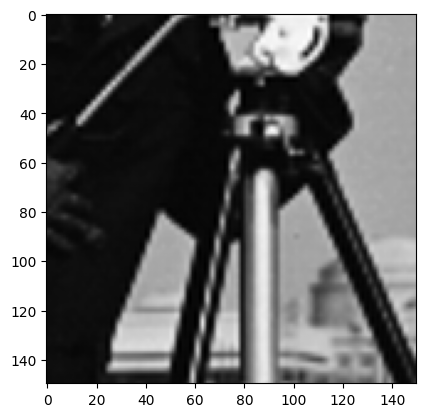

In [13]:
plt.imshow(center_section, cmap='gray')


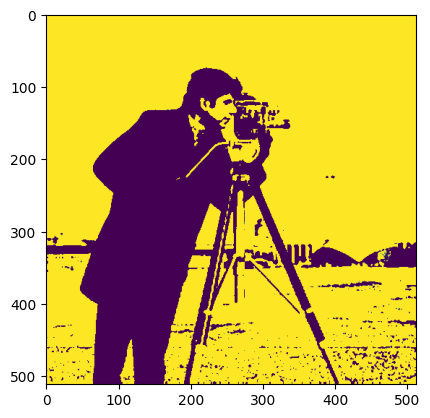

In [15]:
thresholdimg=np.where(grey_image_np<100,0,np.where(grey_image_np > 100, 255, grey_image_np))
plt.imshow(thresholdimg)

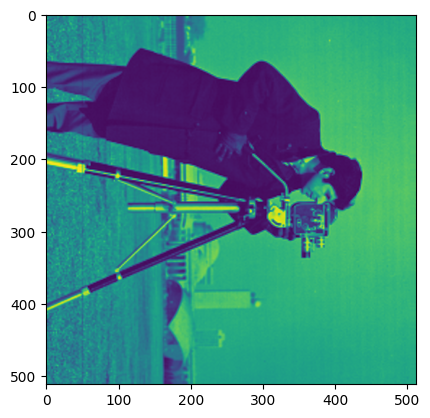

In [17]:
rotated=grey_image.rotate(-90)
plt.imshow(rotated)

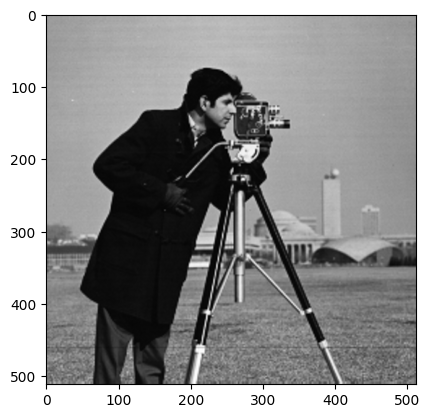

In [18]:
rgbimg=grey_image.convert('RGB')
plt.imshow(rgbimg)

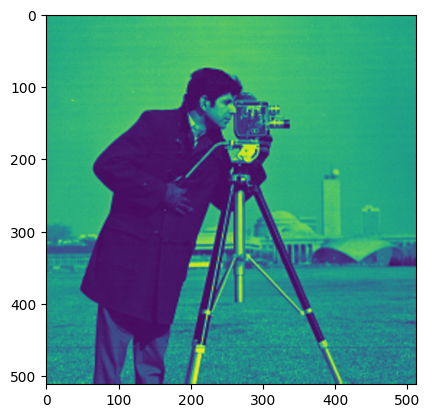

In [21]:
grey_image1 = Image.open("/content/cameraman.png")
plt.imshow(grey_image1)

In [22]:
centeredimg=grey_image1-np.mean(grey_image1)
cov_matrix=np.cov(centeredimg,rowvar=False)
print(cov_matrix)

[[543.51861775 520.97947881 492.56189228 ... 452.37668175 465.56655914
  469.92323569]
 [520.97947881 515.55188585 504.98165744 ... 438.16924535 451.13798771
  455.28722786]
 [492.56189228 504.98165744 514.61175621 ... 415.396557   428.0037075
  431.84547762]
 ...
 [452.37668175 438.16924535 415.396557   ... 694.40484344 701.46153376
  705.1383317 ]
 [465.56655914 451.13798771 428.0037075  ... 701.46153376 724.80795927
  732.40163283]
 [469.92323569 455.28722786 431.84547762 ... 705.1383317  732.40163283
  741.0831091 ]]


In [23]:
eigenvalues , eigenvectors = np . linalg . eigh ( cov_matrix )
sorted_indices = np . argsort ( eigenvalues ) [:: -1]
eigenvalues = eigenvalues [ sorted_indices ]
eigenvectors = eigenvectors [: , sorted_indices ]

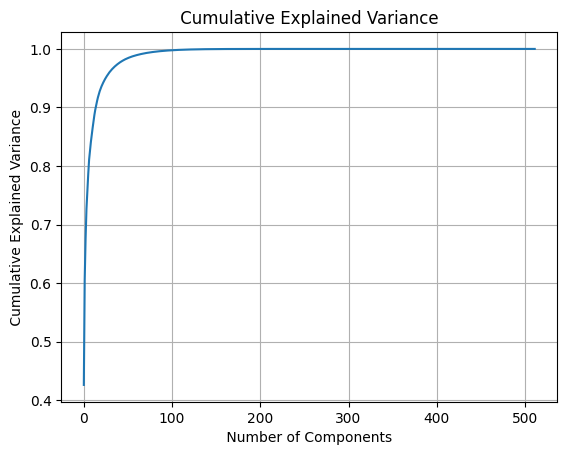

In [24]:
explained_variance_ratio = eigenvalues / np .sum ( eigenvalues )
plt . plot ( np . cumsum ( explained_variance_ratio ) )
plt . title (" Cumulative Explained Variance ")
plt . xlabel (" Number of Components ")
plt . ylabel (" Cumulative Explained Variance ")
plt . grid ( True )
plt . show ()

In [25]:
k=10
components = eigenvectors [: , : k ]

In [26]:
compressed_data = np . dot ( centeredimg , components )

In [28]:
decompressed_data = np . dot ( compressed_data , components . T ) + np.mean(grey_image1)

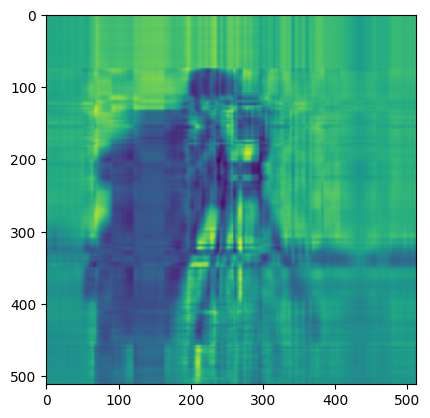

In [29]:
plt.imshow(decompressed_data)